#  NYC Airbnb Exploratory Data Analysis (EDA)

This notebook explores the cleaned NYC Airbnb dataset to uncover trends in pricing, neighborhood performance, and room types. These insights help inform our revenue prediction model and business interpretation.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
plt.style.use('ggplot')
sns.set_palette("viridis")

In [5]:
# Load the cleaned dataset
df = pd.read_csv("../data/processed/airbnb_cleaned.csv")
df.head()

,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
3,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
4,45498551794,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,577.0,115.0,3.0,74.0,0.59,3.0,1.0,374.0


## 1. Price Distribution by Neighborhood Group
This helps us understand how different boroughs affect the pricing strategy.

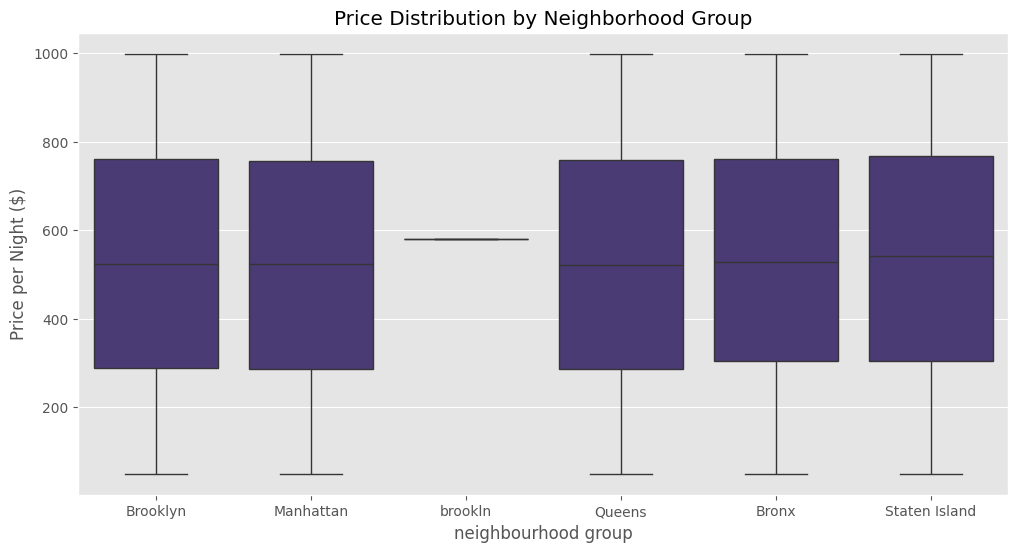

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood group', y='price', data=df)
plt.title('Price Distribution by Neighborhood Group')
plt.ylabel('Price per Night ($)')
plt.show()

## 2. Room Type Availability
Identifying the supply of different room types across the market.

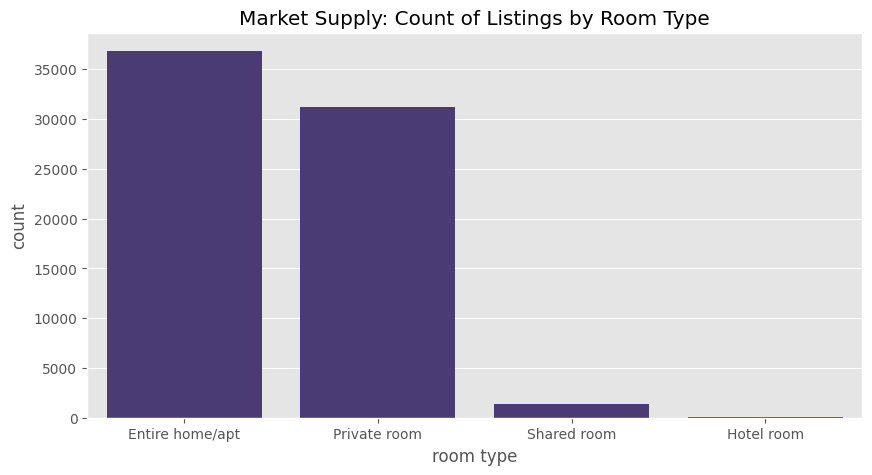

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='room type', data=df, order=df['room type'].value_counts().index)
plt.title('Market Supply: Count of Listings by Room Type')
plt.show()

## 3. Correlation Matrix
Analyzing relationships between numerical features to understand what drives revenue.

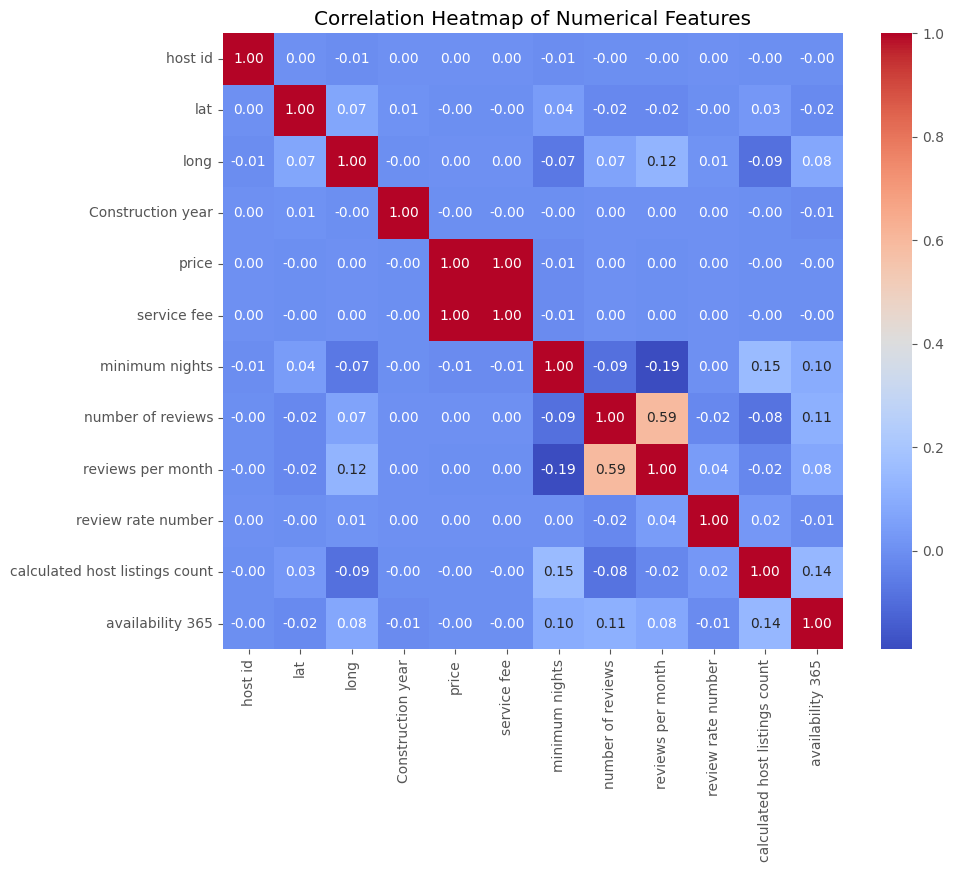

In [8]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## 4. Key Takeaways for Business Strategy
- **Pricing Strategy**: Price variance is highest in Manhattan and Brooklyn, suggesting more aggressive pricing can work there.
- **Supply Gap**: Entire homes dominate the 'High Revenue' segment, while private rooms are high-supply but often lower revenue.
- **Demand Factor**: A strong positive correlation between availability and reviews per month suggests that 'always available' listings accumulate more trust/revenue over time.